## Enzyme figure

Simulating to initial equilibrium (k₁ = 10.0)...
Initial equilibrium: S=0.4500, E=0.5000, C=1.2500, P=0.4000

Perturbing to k₁' = 0.3 × k₁ = 3.0...
New equilibrium:     S=1.5000, E=0.5000, C=1.2500, P=0.4000

Changes:
  ΔS = +1.0500
  ΔE = +0.0000
  ΔC = -0.0000
  ΔP = -0.0000

Saved figure to enzyme_perturbation.png


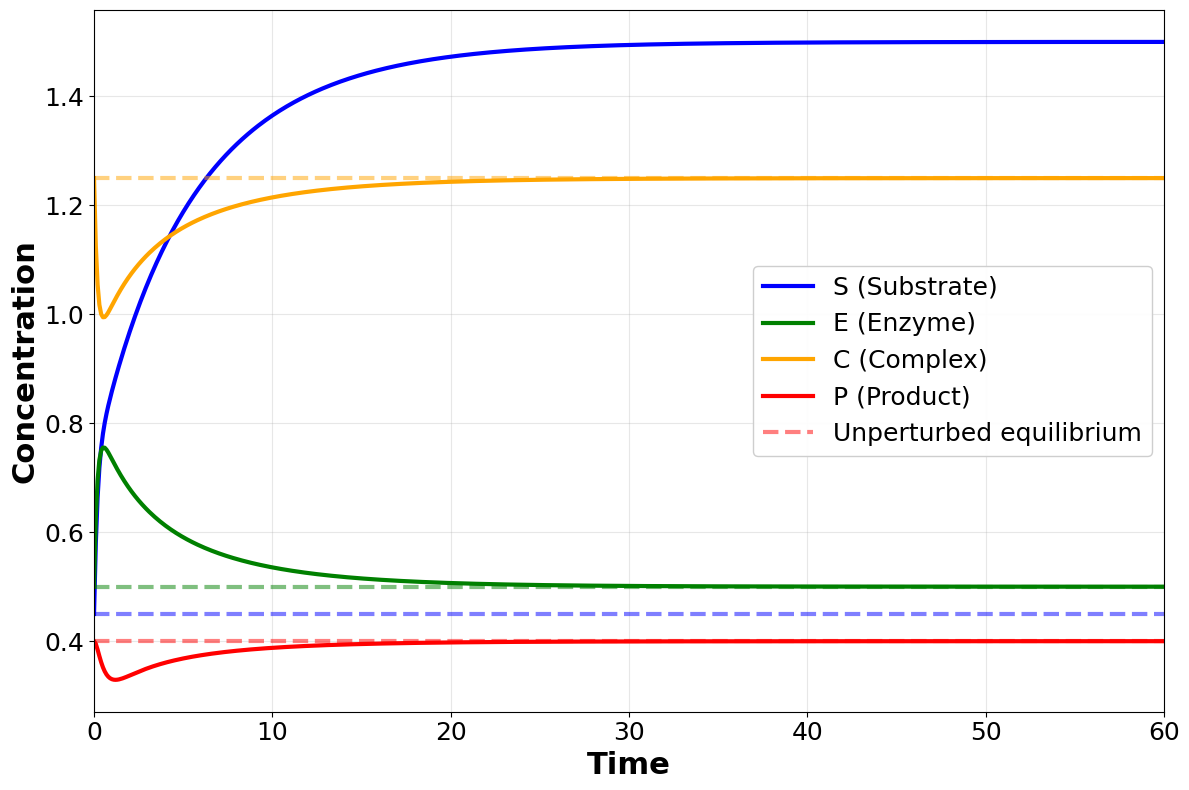


Conservation law (C + E):
  Initial: C + E = 1.7500
  At initial eq: C + E = 1.7500
  At new eq: C + E = 1.7500


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters from Blom & Mooij 2023 (Appendix D)
k_minus1 = 1.0
k0 = 1.0
k1_initial = 10.0
k2 = 0.8
k3 = 2.5

# Initial conditions
S0 = 0.45
E0 = 0.5
C0 = 1.25
P0 = 0.40

# Define the ODE system
def enzyme_odes(t, y, k_minus1, k0, k1, k2, k3):
    """
    Enzyme reaction ODEs from Blom & Mooij 2023
    y = [S, E, C, P]
    """
    S, E, C, P = y
    
    dS_dt = k0 - k1*S*E + k_minus1*C
    dC_dt = k1*S*E - (k_minus1 + k2)*C
    dE_dt = -k1*S*E + (k_minus1 + k2)*C
    dP_dt = k2*C - k3*P
    
    return [dS_dt, dE_dt, dC_dt, dP_dt]

# Step 1: Simulate to equilibrium with initial k1
print(f"Simulating to initial equilibrium (k₁ = {k1_initial})...")
t_span = [0, 100]
t_eval = np.linspace(0, 100, 1000)
y0 = [S0, E0, C0, P0]

sol_initial = solve_ivp(
    lambda t, y: enzyme_odes(t, y, k_minus1, k0, k1_initial, k2, k3),
    t_span, y0, t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-10
)

# Get equilibrium values
S_eq = sol_initial.y[0, -1]
E_eq = sol_initial.y[1, -1]
C_eq = sol_initial.y[2, -1]
P_eq = sol_initial.y[3, -1]

print(f"Initial equilibrium: S={S_eq:.4f}, E={E_eq:.4f}, C={C_eq:.4f}, P={P_eq:.4f}")

# Step 2: Apply perturbation (k1' = 0.3 * k1)
k1_new = 0.3 * k1_initial
print(f"\nPerturbing to k₁' = 0.3 × k₁ = {k1_new}...")

# Start from initial equilibrium
t_span_perturb = [0, 200]
t_eval_perturb = np.linspace(0, 200, 2000)
y0_perturb = [S_eq, E_eq, C_eq, P_eq]

sol_perturb = solve_ivp(
    lambda t, y: enzyme_odes(t, y, k_minus1, k0, k1_new, k2, k3),
    t_span_perturb, y0_perturb, t_eval=t_eval_perturb, 
    method='LSODA', rtol=1e-8, atol=1e-10
)

# Get new equilibrium
S_new = sol_perturb.y[0, -1]
E_new = sol_perturb.y[1, -1]
C_new = sol_perturb.y[2, -1]
P_new = sol_perturb.y[3, -1]

print(f"New equilibrium:     S={S_new:.4f}, E={E_new:.4f}, C={C_new:.4f}, P={P_new:.4f}")
print(f"\nChanges:")
print(f"  ΔS = {S_new - S_eq:+.4f}")
print(f"  ΔE = {E_new - E_eq:+.4f}")
print(f"  ΔC = {C_new - C_eq:+.4f}")
print(f"  ΔP = {P_new - P_eq:+.4f}")

# Step 3: Create visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all four variables during the perturbation response
ax.plot(sol_perturb.t, sol_perturb.y[0], 'b-', linewidth=3, label='S (Substrate)')
ax.plot(sol_perturb.t, sol_perturb.y[1], 'g-', linewidth=3, label='E (Enzyme)')
ax.plot(sol_perturb.t, sol_perturb.y[2], color='orange', linewidth=3, label='C (Complex)')
ax.plot(sol_perturb.t, sol_perturb.y[3], 'r-', linewidth=3, label='P (Product)')

# Add horizontal lines showing initial equilibrium values (larger and in legend)
ax.axhline(S_eq, color='b', linestyle='--', alpha=0.5, linewidth=3)
ax.axhline(E_eq, color='g', linestyle='--', alpha=0.5, linewidth=3)
ax.axhline(C_eq, color='orange', linestyle='--', alpha=0.5, linewidth=3)
ax.axhline(P_eq, color='r', linestyle='--', alpha=0.5, linewidth=3, 
           label='Unperturbed equilibrium')

ax.set_xlabel('Time', fontsize=22, fontweight='bold')
ax.set_ylabel('Concentration', fontsize=22, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(loc='best', fontsize=18, framealpha=0.95)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 60)

plt.tight_layout()
plt.savefig('enzyme_perturbation.png', dpi=300, bbox_inches='tight')
print("\nSaved figure to enzyme_perturbation.png")
plt.show()

# Conservation law check
print(f"\nConservation law (C + E):")
print(f"  Initial: C + E = {C0 + E0:.4f}")
print(f"  At initial eq: C + E = {C_eq + E_eq:.4f}")
print(f"  At new eq: C + E = {C_new + E_new:.4f}")